<a href="https://colab.research.google.com/github/rryoung98/Prime-Number-Factoring/blob/main/Factoring_with_Shor's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factoring prime numbers using Shor's Algorithm. Shor's Algorithm is used for factoring integers in polynomial time. The objective of this project is to compare qiskit and qbraid quantum machines in factoring prime numbers. 


In [1]:
# #Use pip install for qiskit, shor, aqua and backend as needed for runtime
# !qbraid envs pennylane pip install qiskit
# # !pip install Shor
# # !pip install aqua
# # !pip install backend
# # !pip install -U matplotlib
# !qbraid envs pennylane pip install jax
# !qbraid envs pennylane pip install jaxlib
!qbraid envs amazon_braket pip install StrawberryFields

  Using cached qiskit-0.37.1-py3-none-any.whl
  Using cached qiskit_terra-0.21.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.7 MB)
  Using cached qiskit_ibmq_provider-0.19.2-py3-none-any.whl (240 kB)
  Using cached qiskit_aer-0.10.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (18.0 MB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached websockets-10.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (111 kB)
  Using cached symengine-0.9.2-cp39-cp39-manylinux2010_x86_64.whl (37.5 MB)
  Using cached tweedledum-1.1.1-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (930 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Using cached stevedore-4.0.0-py3-none-any.whl (49 kB)
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Using cached pbr-5.10.0-py2.py3-none-any.whl (112 kB)
^C
ERROR: Operation cancell

In [4]:
#Import packages and qiskit libraries
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
# import backend
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor
# from qiskit.components.oracles import TruthTableOracle
from math import gcd
from numpy.random import randint
from fractions import Fraction
print("Imports Successful")

Imports Successful


# Getting Started
If you've heard of quantum computing breaking RSA encrpytion. You're in the right place. Shor's algorithm developed in 1994 by American mathematician Peter Shor, is a cornerstone of quantum computing and is used for factoring prime numbers, which are integers that are not 0 or $\pm 1$ that is not disisbile without remainder by any other integer except $\pm 1$ or $\pm$ itself.




SyntaxError: invalid syntax (4058542738.py, line 2)

Shor's algorithm works by using the period by period finding. 

## Overview of Shor's Algorithm

https://medium.com/a-bit-of-qubit/shors-algorithm-how-does-it-work-aa6153646419


2. Shor’s Algorithm: Steps
With all the necessary definitions above, now we can go through the steps of Shor’s algorithm which he introduced in 1994 [3].

Our objective is to find factors (prime) of a number N=p⋅q.

Pick a number a, which is a co-prime with N. (Classical computer);
Need to find the smallest r such that aʳ≡1(mod N).
If r is even: Go to the next step. If r is odd go back to pick another a.
If r is even then we found the non-trivial square root of N;
Define x=pow(a, r/2). (Classical computer);
If x+1≡0(mod N); then one of p,q is contained in gcd(x+1, N) or gcd(x−1, N). (Classical computer);
If these fail (from step 3); we start everything by considering different a.

 

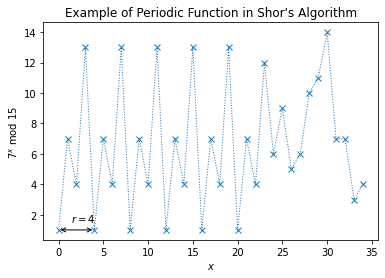

In [5]:
#Setting N = 15 and a = 7
N = 15
a = 7

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel='$%i^x$ mod $%i$' % (a, N),
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) +1 
    plt.annotate('', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'))
    plt.annotate('$r=%i$' % r, xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')




First, we will set up a quantum circuit for period function f(x)=axmodN where a = 7 and N = 15. 




To find the prime numbers of 15, using Shor's algorithm the steps will be to first find a co-prime of 15. Ie we need to find the smallest $r$ such that aʳ≡1(mod N). We first begin with the number 7 and need to check if it satisfies the condition of being a co-prime ie $7c=1(\text{mod}15)$. When we check we do find that the integer $c=2$ satisifies our condition. However, when trying to accomplish prime factorization we need to apply a stricter rule and find non-trivial square root of primes $a^r=1(\text{mod}15)$. A non-trivial square root is extremely helpful in finding primes.


# Getting Started
We'll first start with picking 

In [6]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 11)
print(a)

7


In [7]:
N=12

In [8]:
from math import gcd # greatest common divisor
gcd(a, N)

1

In [9]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [10]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

In [11]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [12]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1)  # -1 means 'do not fold'

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      ┌───┐│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

In [13]:
from qiskit import IBMQ, Aer
# provider = IBMQ.load_account()
# available_cloud_backends = provider.backends() 
# print('\nHere is the list of cloud backends that are available to you:')
# for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\nHere is the list of local backends that are available to you: ')
for i in available_local_backends: print(i)



Here is the list of local backends that are available to you: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


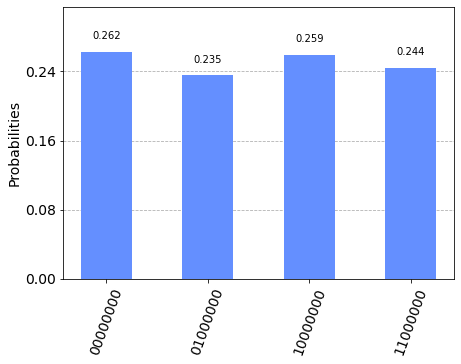

In [14]:
aer_sim = Aer.get_backend('qasm_simulator')

t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [15]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  11000000(bin) = 192(dec)  192/256 = 0.75
3  01000000(bin) =  64(dec)   64/256 = 0.25


In [16]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [17]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

In [18]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.50      1/2            2
2   0.75      3/4            4
3   0.25      1/4            4


Factoring using period finding.

In [19]:
N = 31


In [20]:
np.random.seed(3) # This is to make sure we get reproduceable results
a = randint(1, 27)
print(a)

11


In [21]:
from math import gcd # greatest common divisor
gcd(a, N)

1

In [22]:
def qpe_amod31(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    # Simulate Results
    aer_sim = Aer.get_backend('qasm_simulator')
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=1)
    result = aer_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

In [23]:
phase = qpe_amod31(a) # Phase = s/r
Fraction(phase).limit_denominator(31) # Denominator should (hopefully!) tell us r

Register Reading: 10000000
Corresponding Phase: 0.500000


Fraction(1, 2)

In [24]:
frac = Fraction(phase).limit_denominator(31)
s, r = frac.numerator, frac.denominator
print(r)

2


In [25]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[1, 1]


# Scaling of number of iterations vs N
Big O notation.


In [26]:
a = 11
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    phase = qpe_amod31(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True


Attempt 1:
Register Reading: 10000000
Corresponding Phase: 0.500000
Result: r = 2
Guessed Factors: 1 and 1

Attempt 2:
Register Reading: 10000000
Corresponding Phase: 0.500000
Result: r = 2
Guessed Factors: 1 and 1

Attempt 3:
Register Reading: 00000000
Corresponding Phase: 0.000000
Result: r = 1

Attempt 4:
Register Reading: 10000000
Corresponding Phase: 0.500000
Result: r = 2
Guessed Factors: 1 and 1

Attempt 5:
Register Reading: 00000000
Corresponding Phase: 0.000000
Result: r = 1

Attempt 6:
Register Reading: 00000000
Corresponding Phase: 0.000000
Result: r = 1

Attempt 7:
Register Reading: 00000000
Corresponding Phase: 0.000000
Result: r = 1

Attempt 8:
Register Reading: 10000000
Corresponding Phase: 0.500000
Result: r = 2
Guessed Factors: 1 and 1

Attempt 9:
Register Reading: 10000000
Corresponding Phase: 0.500000
Result: r = 2
Guessed Factors: 1 and 1

Attempt 10:
Register Reading: 10000000
Corresponding Phase: 0.500000
Result: r = 2
Guessed Factors: 1 and 1

Attempt 11:
Regist

KeyboardInterrupt: 

# My Shor's Factoring Algorithm
Shor's algorithm consists of a classical and quantum portion


## Classical Portion
After checking out the pre-build Shor's algorithm, let's try and code it ourselves. We're going to use Google's Cirq framework.

Our task is to take some prime integer $N$ and factor it. We first need to make sure that there isn't a classical nontrivial factor (a facotr other than 1 and the number itself).  This can be determined by taking the GCD (greatest common denominator) of the random number, $a$, and $N$.

$$\text{GCD}(a,N) \neq 1$$


If it isn't equal to 1, then we've found integers which factor $N$! Here's a quick example where, $N=52$ and $a=6$ and it's greatest common denominator $\text{GCD}(6,52)=2$. This implies that both 6 and 52 can be divided 2 so we're done with finding a factor of $52$.

## Quantum Period Finding Subroutine
If it is equal to 1, we'll need to apply the period-finding subroutine to find the period $r$ of the function. 

The period finding subroutine, is a neat little trick to make finding factors of a number much easier which involves quantum phase estimation


In [ ]:
import cirq
"""Example of defining an arithmetic (quantum) gate in Cirq."""
class Adder(cirq.ArithmeticGate):
    """Quantum addition."""
    def __init__(
        self,
        target_register: [int, Sequence[int]],
        input_register: Union[int, Sequence[int]],
    ):
        self.target_register = target_register
        self.input_register = input_register

    def registers(self) -> Sequence[Union[int, Sequence[int]]]:
        return self.target_register, self.input_register

    def with_registers(
        self, *new_registers: Union[int, Sequence[int]]
    ) -> 'Adder':
        return Adder(*new_registers)

    def apply(self, *register_values: int) -> Union[int, Iterable[int]]:
        return sum(register_values)
    def _circuit_diagram_info_(self, args: cirq.CircuitDiagramInfoArgs):
        wire_symbols = [' + ' for _ in range(len(self.input_register)+len(self.target_register))]
        return cirq.CircuitDiagramInfo(wire_symbols=tuple(wire_symbols))

In [1]:
"""Defines the modular exponential gate used in Shor's algorithm."""
class ModularExp(cirq.ArithmeticGate):
    """Quantum modular exponentiation.

    This class represents the unitary which multiplies base raised to exponent
    into the target modulo the given modulus. More precisely, it represents the
    unitary V which computes modular exponentiation x**e mod n:

        V|y⟩|e⟩ = |y * x**e mod n⟩ |e⟩     0 <= y < n
        V|y⟩|e⟩ = |y⟩ |e⟩                  n <= y

    where y is the target register, e is the exponent register, x is the base
    and n is the modulus. Consequently,

        V|y⟩|e⟩ = (U**e|y)|e⟩

    where U is the unitary defined as

        U|y⟩ = |y * x mod n⟩      0 <= y < n
        U|y⟩ = |y⟩                n <= y
    """
    def __init__(
        self,
        target: Sequence[int],
        exponent: Union[int, Sequence[int]],
        base: int,
        modulus: int
    ) -> None:
        if len(target) < modulus.bit_length():
            raise ValueError(
                f'Register with {len(target)} qubits is too small for modulus'
                f' {modulus}'
            )
        self.target = target
        self.exponent = exponent
        self.base = base
        self.modulus = modulus

    def registers(self) -> Sequence[Union[int, Sequence[int]]]:
        return self.target, self.exponent, self.base, self.modulus

    def with_registers(
        self, *new_registers: Union[int, Sequence[int]]
    ) -> 'ModularExp':
        """Returns a new ModularExp object with new registers."""
        if len(new_registers) != 4:
            raise ValueError(
                f'Expected 4 registers (target, exponent, base, '
                f'modulus), but got {len(new_registers)}'
            )
        target, exponent, base, modulus = new_registers
        if not isinstance(target, Sequence):
            raise ValueError(
                f'Target must be a qubit register, got {type(target)}'
            )
        if not isinstance(base, int):
            raise ValueError(
                f'Base must be a classical constant, got {type(base)}'
            )
        if not isinstance(modulus, int):
            raise ValueError(
              f'Modulus must be a classical constant, got {type(modulus)}'
            )
        return ModularExp(target, exponent, base, modulus)

    def apply(self, *register_values: int) -> int:
        """Applies modular exponentiation to the registers.

        Four values should be passed in.  They are, in order:
          - the target
          - the exponent
          - the base
          - the modulus

        Note that the target and exponent should be qubit
        registers, while the base and modulus should be
        constant parameters that control the resulting unitary.
        """
        assert len(register_values) == 4
        target, exponent, base, modulus = register_values
        if target >= modulus:
            return target
        return (target * base**exponent) % modulus

    def _circuit_diagram_info_(
      self, args: cirq.CircuitDiagramInfoArgs
    ) -> cirq.CircuitDiagramInfo:
        """Returns a 'CircuitDiagramInfo' object for printing circuits.

        This function just returns information on how to print this operation
        out in a circuit diagram so that the registers are labeled
        appropriately as exponent ('e') and target ('t').
        """
        assert args.known_qubits is not None
        wire_symbols = [f't{i}' for i in range(len(self.target))]
        e_str = str(self.exponent)
        if isinstance(self.exponent, Sequence):
            e_str = 'e'
            wire_symbols += [f'e{i}' for i in range(len(self.exponent))]
        wire_symbols[0] = f'ModularExp(t*{self.base}**{e_str} % {self.modulus})'
        return cirq.CircuitDiagramInfo(wire_symbols=tuple(wire_symbols))


## Create period finding subroutine
We now want to use the above custom gates to implement the quantum period finding subroutine

In [ ]:

def quantum_period_finding(x: int, n: int) -> cirq.Circuit:

    L = n.bit_length()
    target = cirq.LineQubit.range(L)
    exponent = cirq.LineQubit.range(L, 3 * L + 3)

    # Create a ModularExp gate sized for these registers.
    mod_exp = ModularExp([2] * L, [2] * (2 * L + 3), x, n)

    return cirq.Circuit(
        cirq.X(target[L - 1]),
        cirq.H.on_each(*exponent),
        mod_exp.on(*target, *exponent),
        cirq.qft(*exponent, inverse=True),
        cirq.measure(*exponent, key='exponent'),
    )

## Processing the results
Finally, we need to take the processed results and clean it with some classical post processing

In [ ]:
def process_measurement(result: cirq.Result, x: int, n: int) -> Optional[int]:
    """Interprets the output of the order finding circuit.

    Specifically, it determines s/r such that exp(2πis/r) is an eigenvalue
    of the unitary

        U|y⟩ = |xy mod n⟩  0 <= y < n
        U|y⟩ = |y⟩         n <= y

    then computes r (by continued fractions) if possible, and returns it.

    Args:
        result: result obtained by sampling the output of the
            circuit built by make_order_finding_circuit

    Returns:
        r, the order of x modulo n or None.
    """
    # Read the output integer of the exponent register.
    exponent_as_integer = result.data["exponent"][0]
    exponent_num_bits = result.measurements["exponent"].shape[1]
    eigenphase = float(exponent_as_integer / 2**exponent_num_bits)

    # Run the continued fractions algorithm to determine f = s / r.
    f = fractions.Fraction.from_float(eigenphase).limit_denominator(n)

    # If the numerator is zero, the order finder failed.
    if f.numerator == 0:
        return None

    # Else, return the denominator if it is valid.
    r = f.denominator
    if x**r % n != 1:
        return None
    return r

In [ ]:
def shors_algorithm(N):
    a = np.random(1, N)
    if math.gcd(a,N) != 1:
        # we've found a trivial factor so we're done
        print("we've found a trivial factor so we're done")
        k = math.gcd(a,N)
        factor = N/k
        print(f"{k}  and {factor} are integers which factor N")
        return (k, factor)
    else:
        """Measuring Shor's period finding circuit."""
        circuit = quantum_period_finding(a,N)
        res = cirq.sample(circuit, repetitions=8)
    

## Implementing QPE (Quantum Phase Estimation)

QPE is an algorithm which allows the estimation of $\theta$ in $U|{\psi}\rangle. = \exp^{2\pi i \theta}$. This is an important portion of Shor's algorithm because finding the prime number requires finding the period of $|\psi\rangle = \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}|\chi_s \rangle = | \phi \rangle$. 

We initialize our qubit with the eigenstate using the X gate.

In [ ]:
cirq.X(qubits[-1])
print(counting_qubits)

We then apply the Hadamard gate to set $n$ qubits to be a superposition of the 0 and 1 state. This implies that we get $2^n$ states for our input qubits.

In [ ]:
for qubit in counting_qubits[:-1]:
    cirq.H(qubit)

In [ ]:
zo# qBraid's tutorial on Shor's factoring algorithm (ie qiskit's old version)
N = 31 #Enter an odd integer > 1


backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = shor.run(quantum_instance)
print(f"The list of factors of {N} as computed by the Shor's algorithm is {result['factors'][0]}.")

In [28]:
print(f'Computed of qubits for circuit: {4 * math.ceil(math.log(N, 2)) + 2}')
print(f'Actual number of qubits of circuit: {shor.construct_circuit().num_qubits}')

Computed of qubits for circuit: 22


NameError: name 'shor' is not defined

In [29]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

# Classical Factorization

In [ ]:
num=int(input("enter a number"))
factors=[]
for i in range(1,num+1):
    if num%i==0:
       factors.append(i)

print ("Factors of {} = {}".format(num,factors))

# Sieve of Eratosthenes

In [ ]:
# Python program to print all Primes Smaller
# than or equal to N using Sieve of Eratosthenes


def SieveOfEratosthenes(num):
	prime = [True for i in range(num+1)]
# boolean array
	p = 2
	while (p * p <= num):

		# If prime[p] is not
		# changed, then it is a prime
		if (prime[p] == True):

			# Updating all multiples of p
			for i in range(p * p, num+1, p):
				prime[i] = False
		p += 1

	# Print all prime numbers
	for p in range(2, num+1):
		if prime[p]:
			print(p)


# Driver code
if __name__ == '__main__':
	num = 50
	print("Following are the prime numbers smaller"),
	print("than or equal to", num)
	SieveOfEratosthenes(num)
